In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data

from utils import *
from vgg import *


To run this notebook, you need saved dictionary of best trained model and validation accuracy from VGG_A ~ E notebooks.  
But unfortunately, I could not attatch the dictionarys because of the submission file size limitation. 

You can get those dicts by running all VGG_A~E notebooks, but it might take quite long time.  
If you don't want to do that, you can just check the saved results below :)

# Number of Parameters in each configturation

In [3]:
#num parameters
print('VGG Net')
print(countParam('A_best'))
print(countParam('B_best'))
print(countParam('C_best'))
print(countParam('D_best'))
print(countParam('E_best'))
print()
print('conv Net')
print(countParam('LA_best'))
print(countParam('LB_best'))
print(countParam('LC_best'))
print(countParam('LD_best'))
print(countParam('LE_best'))


VGG Net
9750922
9935434
10526538
15245130
20554826

conv Net
11256970
11391114
11982218
21614730
35246218


# VGG Net
The graph shows validation accuracy of each epoch. There are some fluctuations in lines. but by decreasing learning rate by a factor of 10 when the validation accuracy stopped improving, line converges to the optimal at last.
We can see that Config A is quite lower than the others and the others shows similar performance.

Config A) Max val acc : 0.7947 
Config B) Max val acc : 0.8232 
Config C) Max val acc : 0.8246 
Config D) Max val acc : 0.8247 
Config E) Max val acc : 0.8281 


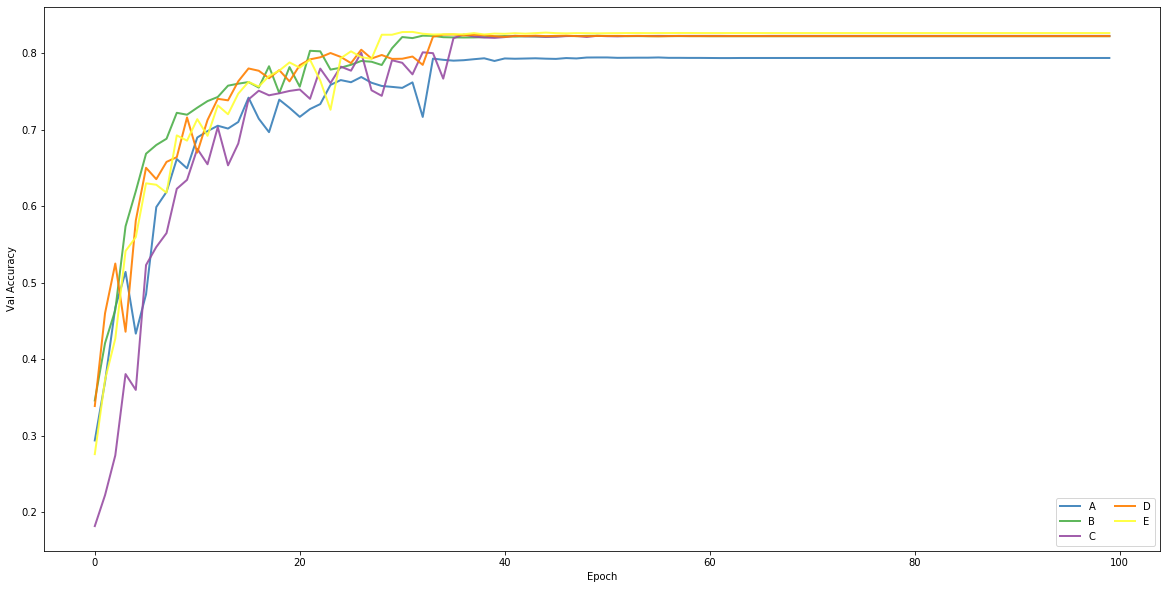

In [3]:
### plot learning curv ###

# Make a data frame
df=pd.DataFrame({'x': range(100),
                 'A' : getValAcc('Val_acc_A'),
                 'B' : getValAcc('Val_acc_B'),
                 'C' : getValAcc('Val_acc_C'),
                 'D' : getValAcc('Val_acc_D'),
                 'E' : getValAcc('Val_acc_E')})

# style
#plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
plt.figure(figsize=(20,10))

for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column,)

# Add legend
plt.legend(loc=4, ncol=2)
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")

for conf in df.keys():
    if conf != 'x':
        print("Config %s) Max val acc : %.4f " %(conf, float(df[conf].max())))

In [4]:
### Test Accuracy ###

CONF = {'A': [64, 'MP', 128, 'MP', 256, 256, 'MP', 512, 512, 'MP', 512, 512, 'MP'],
        'B': [64, 64, 'MP', 128, 128, 'MP', 256, 256, 'MP', 512, 512, 'MP', 512, 512, 'MP'],
        'C': [64, 64, 'MP', 128, 128, 'MP', 256, 256, (1, 256), 'MP', 512, 512, (1, 512), 'MP', 512, 512, (1, 512), 'MP'],
        'D': [64, 64, 'MP', 128, 128, 'MP', 256, 256, 256, 'MP', 512, 512, 512, 'MP', 512, 512, 512, 'MP'],
        'E': [64, 64, 'MP', 128, 128, 'MP', 256, 256, 256, 256, 'MP', 512, 512, 512, 512, 'MP', 512, 512, 512, 512, 'MP']}

# Load test dataset
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_data = torchvision.datasets.CIFAR10(root='./data', train = False, download = True, transform = transform_test)
test_loader = data.DataLoader(test_data, shuffle = True, batch_size=512, num_workers = 2)
length = len(test_data)
print()

criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


for conf in ['A', 'B', 'C', 'D', 'E']:
    print("Config " + conf)
    
    vgg = VGG(CONF, conf)
    vgg.load_state_dict(LoadDict(conf+'_best'), True)
    if device == 'cuda':
        vgg.to(device)
        criterion.cuda()
    _ = validate(vgg, device, test_loader, length, criterion, mode = 'test')
    print()

Files already downloaded and verified

Config A
Test Loss: 0.9896 Acc: 0.7925

Config B
Test Loss: 0.7945 Acc: 0.8206

Config C
Test Loss: 0.6937 Acc: 0.8216

Config D
Test Loss: 0.8069 Acc: 0.8224

Config E
Test Loss: 0.7332 Acc: 0.8231



# Larger conv. net
From the validation accuracy curve, we can see it is trained slightly slower than VGG net.

Config LA) Max val acc : 0.7786 
Config LB) Max val acc : 0.7881 
Config LC) Max val acc : 0.7855 
Config LD) Max val acc : 0.7714 
Config LE) Max val acc : 0.7718 


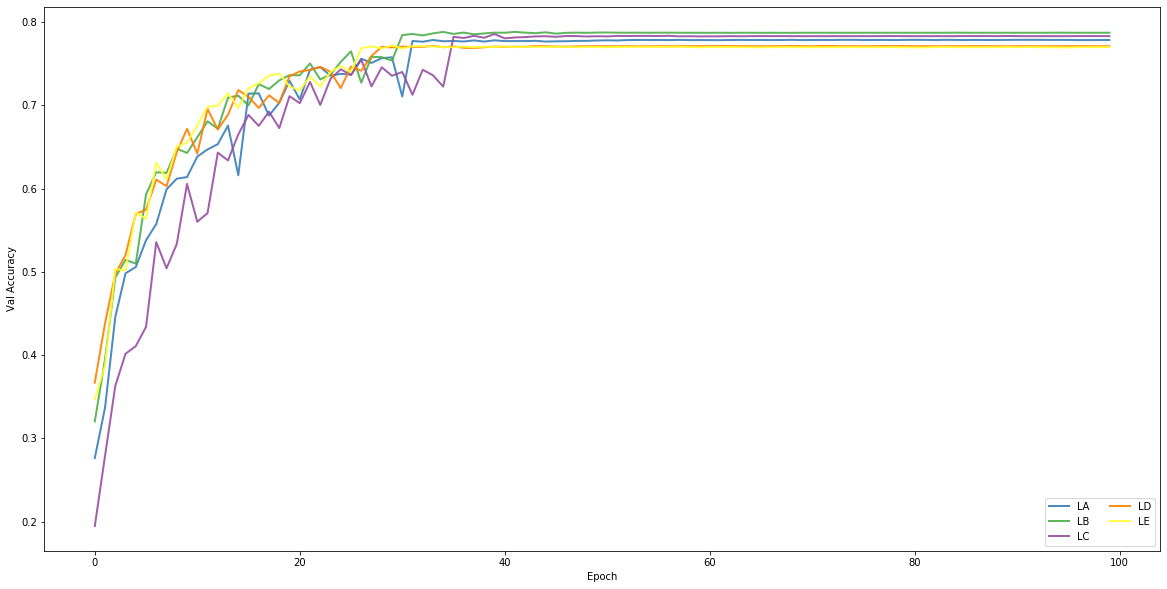

In [6]:
### plot train procedure ###

# Make a data frame
df=pd.DataFrame({'x': range(100),
                 'LA' : getValAcc('Val_acc_LA'),
                 'LB' : getValAcc('Val_acc_LB'),
                 'LC' : getValAcc('Val_acc_LC'),
                 'LD' : getValAcc('Val_acc_LD'),
                 'LE' : getValAcc('Val_acc_LE')})

# style
#plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
plt.figure(figsize=(20,10))

for column in df.drop('x', axis=1):
    num+=1
    plt.plot(df['x'], df[column], marker='', color=palette(num), linewidth=2, alpha=0.9, label=column,)

# Add legend
plt.legend(loc=4, ncol=2)
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")

for conf in df.keys():
    if conf != 'x':
        print("Config %s) Max val acc : %.4f " %(conf, float(df[conf].max())))

In [8]:
L_CONF = {'A': [64, 'MP', 128, 'MP', (5, 256), 'MP', (5, 512), 'MP', (5, 512), 'MP'],
        'B': [(5, 64), 'MP', (5, 128), 'MP', (5, 256), 'MP', (5, 512), 'MP', (5, 512), 'MP'],
        'C': [(5, 64), 'MP', (5, 128), 'MP', (5, 256),(1, 256), 'MP', (5, 512),(1, 512), 'MP', (5, 512),(1, 512), 'MP'],
        'D': [(5, 64), 'MP', (5, 128), 'MP', (7, 256), 'MP', (7, 512), 'MP', (7, 512), 'MP'],
        'E': [(5, 64), 'MP', (5, 128), 'MP', (9, 256), 'MP', (9, 512), 'MP', (9, 512), 'MP']}


criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'


for conf in ['A', 'B', 'C', 'D', 'E']:
    print("Config L" + conf)
    
    vgg = VGG(L_CONF, conf)
    vgg.load_state_dict(LoadDict('L'+conf+'_best'), True)
    if device == 'cuda':
        vgg.to(device)
        criterion.cuda()
    _ = validate(vgg, device, test_loader, length, criterion, mode = 'test')
    print()

Config LA
Test Loss: 0.8753 Acc: 0.7771

Config LB
Test Loss: 0.8912 Acc: 0.7822

Config LC
Test Loss: 0.8308 Acc: 0.7831

Config LD
Test Loss: 0.9445 Acc: 0.7707

Config LE
Test Loss: 0.8701 Acc: 0.7742

